In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data.head()
data.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

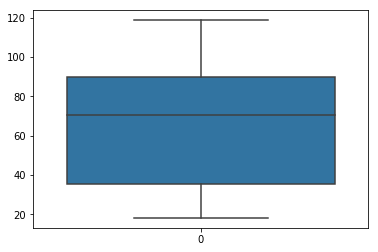

In [6]:
sn.boxplot(data=data["MonthlyCharges"])

In [7]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors='coerce')

In [8]:
data["TotalCharges"].isna().sum()

11

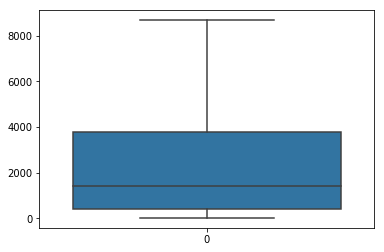

In [9]:
sn.boxplot(data=data["TotalCharges"])

In [10]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
data.dropna(subset=['TotalCharges'], inplace=True)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


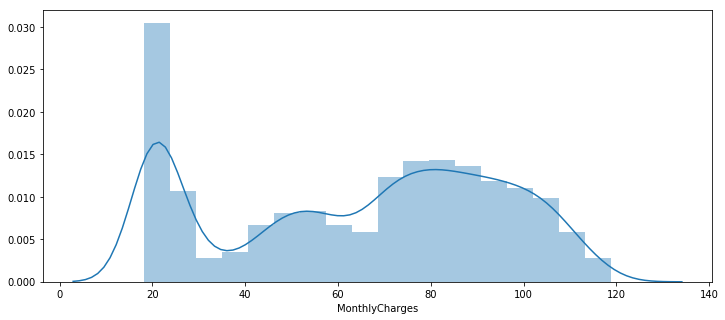

In [12]:
plt.figure(figsize=(12,5))
sn.distplot(data.MonthlyCharges)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


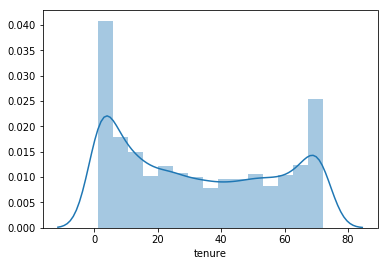

In [13]:
sn.distplot(data.tenure)

In [14]:
data.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


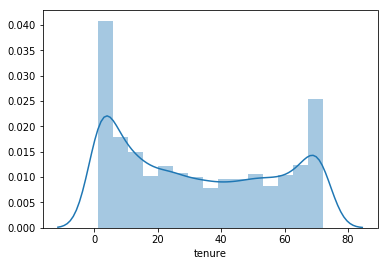

In [15]:
sn.distplot(data.tenure)

In [16]:
one_hot_columns = ['gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                   'PaymentMethod']

In [17]:
data = pd.get_dummies(data, columns=one_hot_columns)

In [18]:
data.drop('customerID', axis =1, inplace=True)
data.describe()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.495307,0.504693,0.837600,0.162400,0.517491,0.482509,0.701507,...,0.388367,0.551052,0.209329,0.239619,0.407281,0.592719,0.219283,0.216297,0.336320,0.228100
std,24.545260,30.085974,2266.771362,0.500014,0.500014,0.368844,0.368844,0.499729,0.499729,0.457629,...,0.487414,0.497422,0.406858,0.426881,0.491363,0.491363,0.413790,0.411748,0.472483,0.419637
min,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.587500,401.450000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
from sklearn.model_selection import train_test_split

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [22]:
X_train, X_test, y_train, y_test =  train_test_split(data.drop('Churn', axis=1), data['Churn'], test_size= 0.30)

In [23]:
from sklearn.linear_model import LogisticRegression

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
predictions = logmodel.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

         No       0.85      0.90      0.87      1552
        Yes       0.67      0.55      0.60       558

avg / total       0.80      0.81      0.80      2110



In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [29]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
predictions = dtree.predict(X_test)

In [31]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

         No       0.83      0.81      0.82      1552
        Yes       0.50      0.54      0.52       558

avg / total       0.74      0.74      0.74      2110



In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rfc_pred = rfc.predict(X_test)

In [34]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

         No       0.83      0.91      0.87      1552
        Yes       0.65      0.48      0.55       558

avg / total       0.78      0.79      0.78      2110



In [35]:
from sklearn.svm import SVC

In [36]:
model = SVC()

In [37]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
predictions = model.predict(X_test)

In [45]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

         No       0.79      0.95      0.86      1552
        Yes       0.68      0.31      0.42       558

avg / total       0.76      0.78      0.75      2110



In [40]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [43]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] kernel=rbf, C=0.1, gamma=1 ......................................
[CV]  kernel=rbf, C=0.1, gamma=1, score=0.7336989640463132, total=   1.4s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  kernel=rbf, C=0.1, gamma=1, score=0.7336989640463132, total=   1.6s
[CV] kernel=rbf, C=0.1, gamma=1 ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


[CV]  kernel=rbf, C=0.1, gamma=1, score=0.7335365853658536, total=   1.6s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.7464960390006093, total=   1.4s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.7452772699573431, total=   1.4s
[CV] kernel=rbf, C=0.1, gamma=0.1 ....................................
[CV]  kernel=rbf, C=0.1, gamma=0.1, score=0.7414634146341463, total=   1.4s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV]  kernel=rbf, C=0.1, gamma=0.01, score=0.7538086532602072, total=   1.4s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV]  kernel=rbf, C=0.1, gamma=0.01, score=0.7659963436928702, total=   1.3s
[CV] kernel=rbf, C=0.1, gamma=0.01 ...................................
[CV]  kernel=rbf, C=0.1, gamma=0.01, score=0.7524390243902439, total=   1.3s
[CV] kernel=rbf, C=0.1, gamma=0.001 .....

[CV]  kernel=rbf, C=100, gamma=0.0001, score=0.7751371115173674, total=   1.6s
[CV] kernel=rbf, C=100, gamma=0.0001 .................................
[CV]  kernel=rbf, C=100, gamma=0.0001, score=0.7798780487804878, total=   1.6s
[CV] kernel=rbf, C=1000, gamma=1 .....................................
[CV]  kernel=rbf, C=1000, gamma=1, score=0.7336989640463132, total=   1.5s
[CV] kernel=rbf, C=1000, gamma=1 .....................................
[CV]  kernel=rbf, C=1000, gamma=1, score=0.7428397318708104, total=   1.8s
[CV] kernel=rbf, C=1000, gamma=1 .....................................
[CV]  kernel=rbf, C=1000, gamma=1, score=0.7402439024390244, total=   1.5s
[CV] kernel=rbf, C=1000, gamma=0.1 ...................................
[CV]  kernel=rbf, C=1000, gamma=0.1, score=0.7538086532602072, total=   1.7s
[CV] kernel=rbf, C=1000, gamma=0.1 ...................................
[CV]  kernel=rbf, C=1000, gamma=0.1, score=0.7599024984765387, total=   1.7s
[CV] kernel=rbf, C=1000, gamma=0.1 ..

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [46]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [47]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
grid_predictions = grid.predict(X_test)

In [49]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

         No       0.83      0.91      0.87      1552
        Yes       0.66      0.47      0.55       558

avg / total       0.78      0.80      0.78      2110

